In [1]:
import os
from scipy.io import arff
from fABBA import JABBA
from software.qabba import QABBA

import matplotlib.pyplot as plt
import numpy as np

_dir = 'UEA2018' # your data file location
tols = [0.05, 0.005]
alphas = [0.005]

def preprocess(data):
    time_series = list()
    for ii in data[0]:
        database = list()
        for i in ii[0]:
            database.append(list(i))
        time_series.append(database)
    return np.nan_to_num(np.array(time_series))

files = ['AtrialFibrillation', 'BasicMotions', 'CharacterTrajectories', 
         'Epilepsy', 'JapaneseVowels', 'NATOPS', 'UWaveGestureLibrary']




Generate 249 symbols


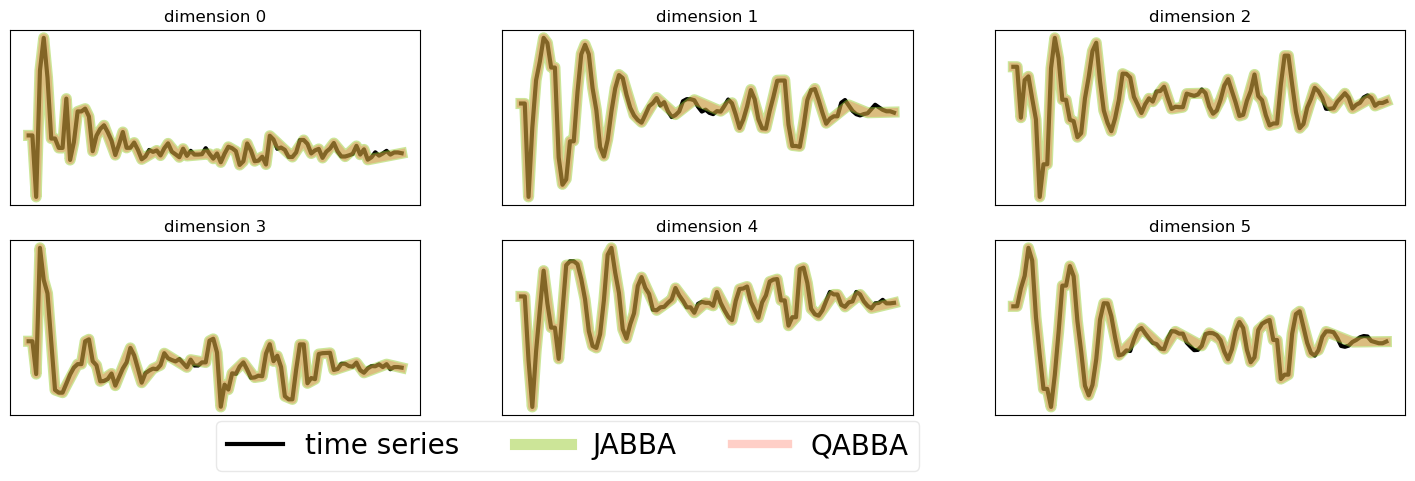

In [2]:
num= 0
data = arff.loadarff(os.path.join(_dir, os.path.join(files[1], files[1]+'_TRAIN.arff')))
multivariate_ts = preprocess(data)

mts =((multivariate_ts[num].T - multivariate_ts[num].T.mean(axis=0)) /multivariate_ts[num].T.std(axis=0)).T

jabba = JABBA(tol=0.05, init="agg", alpha=0.005, verbose=1)
symbols_series = jabba.fit_transform(mts)
reconstruction_JABBA = jabba.inverse_transform(symbols_series)

qabba = QABBA(tol=0.05, init="agg", alpha=0.005, bits_for_len=8, bits_for_inc=12, verbose=0)
symbols_series = qabba.fit_transform(mts)
reconstruction_QABBA = qabba.inverse_transform(symbols_series)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 5))

for i in range(2):
    for j in range(3):
        ax[i,j].plot(mts[i*3 + j], c='black', linewidth=3, label='time series')
        ax[i,j].plot(reconstruction_JABBA[i*3 + j], c='yellowgreen', linewidth=8, alpha=0.5, label='JABBA')
        ax[i,j].plot(reconstruction_QABBA[i*3 + j], c='tomato', linewidth=6, alpha=0.3, label='QABBA')

        ax[i,j].set_title('dimension '+str(i*3 + j))
        ax[i,j].set_xticks([]);ax[i,j].set_yticks([])

plt.legend(loc='lower right', bbox_to_anchor=[-0.15, -0.4], ncols=3, framealpha=0.45, fontsize=20)
plt.show()

In [ ]:
AtrialFibrillation 30 2 640
BasicMotions 80 6 100
CharacterTrajectories 2,858 3 182
Epilepsy 275 3 206
JapaneseVowels 640 12 29
NATOPS 360 24 51
UWaveGestureLibrary 440 3 315